#####  data:Chipotale 
Date:18-June-24

Ankur Pancholi


In [18]:
#import libraries
import pandas as pd
import numpy as np

In [19]:
#importing dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo =  pd.read_csv(url, sep='\t')

In [20]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [21]:
chipo.shape  #showing number of Rows and Columns

(4622, 5)

In [22]:
chipo.shape[1] #numbre of Columns

5

# let get the info of data

In [23]:
chipo.info() #show the details of data type and also u can know the missing values if any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [24]:
chipo.describe() #summary include only numerical column


,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [25]:
chipo.describe(include='all') #include all column both numerical and catagorical

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


Looks like it doesnt have any null values. But datatype of item_price is not in numerical. It seem that $ sign is the problem

OBJECTIVE : TO REMOVE THE $ SIGN, SO ITEM PRICE COLUMN GETS CONVERTED TO FLOAT TYPE

In [26]:
#convert the item size to float and remove $
remove_dollar=lambda x: float(x[1:])
chipo['item_price']=chipo['item_price'].apply(remove_dollar)
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

##### which was the most ordered item by quantity?

In [27]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [28]:
#group by item name and get sum of quantity .
c=chipo.groupby('item_name')
c=c['quantity'].sum()

In [22]:
c

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [29]:
#sorting in desc to get to top value
c=c.sort_values(ascending=False)
c

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


In [30]:
c.head(10)

item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

##### which was most orderd choice description item by quantity?

In [60]:
c1=chipo.groupby('choice_description')
c1=c1['quantity'].sum()
c1=c1.sort_values(ascending=False).head(10)
c1

choice_description
[Diet Coke]                                                                          159
[Coke]                                                                               143
[Sprite]                                                                              89
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                49
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]                         42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
[Lemonade]                                                                            36
[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice, Cheese, Sour Cream]]                  36
[Coca Cola]                                                                           32
[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream, Lettuce]]                             30
Name: quantity, dtype: int64

##### How many items were ordered in total?

In [32]:
a=chipo['quantity'].sum()
print(a)

4972


In [33]:
chipo['revenue']=chipo['quantity']*chipo['item_price']

In [34]:
chipo

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [35]:
total_revenue=chipo['revenue'].sum()
total_revenue

39237.02

In [58]:
print(f"The total revenue of sold items is:{total_revenue}")

The total revenue of sold items is:39237.02


In [36]:
#get the unique orders. coz every one in their salad ask for different sauces and filling
chipo['order_id'].nunique()

1834

##### what is the average revenue per order

In [46]:
order_revenue=chipo.groupby('item_name')
order_revenue=order_revenue['revenue'].sum().sort_values(ascending=False)


order_revenue

item_name
Chicken Bowl                             8044.63
Chicken Burrito                          6387.06
Steak Burrito                            4236.13
Steak Bowl                               2479.81
Chips and Guacamole                      2475.62
Chicken Salad Bowl                       1506.25
Chicken Soft Tacos                       1199.01
Chips and Fresh Tomato Salsa             1033.96
Veggie Burrito                           1002.27
Veggie Bowl                               901.95
Barbacoa Burrito                          894.75
Carnitas Bowl                             830.71
Barbacoa Bowl                             672.36
Bottled Water                             649.18
Carnitas Burrito                          616.33
Canned Soft Drink                         603.75
Chips                                     580.34
Steak Soft Tacos                          554.55
Chicken Crispy Tacos                      524.11
Steak Salad Bowl                          391.15
Carnitas S

In [63]:
average_revenue=order_revenue.mean()

In [68]:
print(f"The Average Revenue by Order is:{average_revenue:,.2f}")

The Average Revenue by Order is:21.39


##### How many diffrent item are sold?


In [69]:
chipo["item_name"].nunique() #Gives total number of unique items 

50

In [70]:
chipo["item_name"].unique() #Gives the list of all unique items sold in Array form

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [56]:
#Top 10 most ordered items

topsold_10Items = chipo['item_name'].value_counts().head(10)
topsold_10Items


Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

#### CHARTS


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

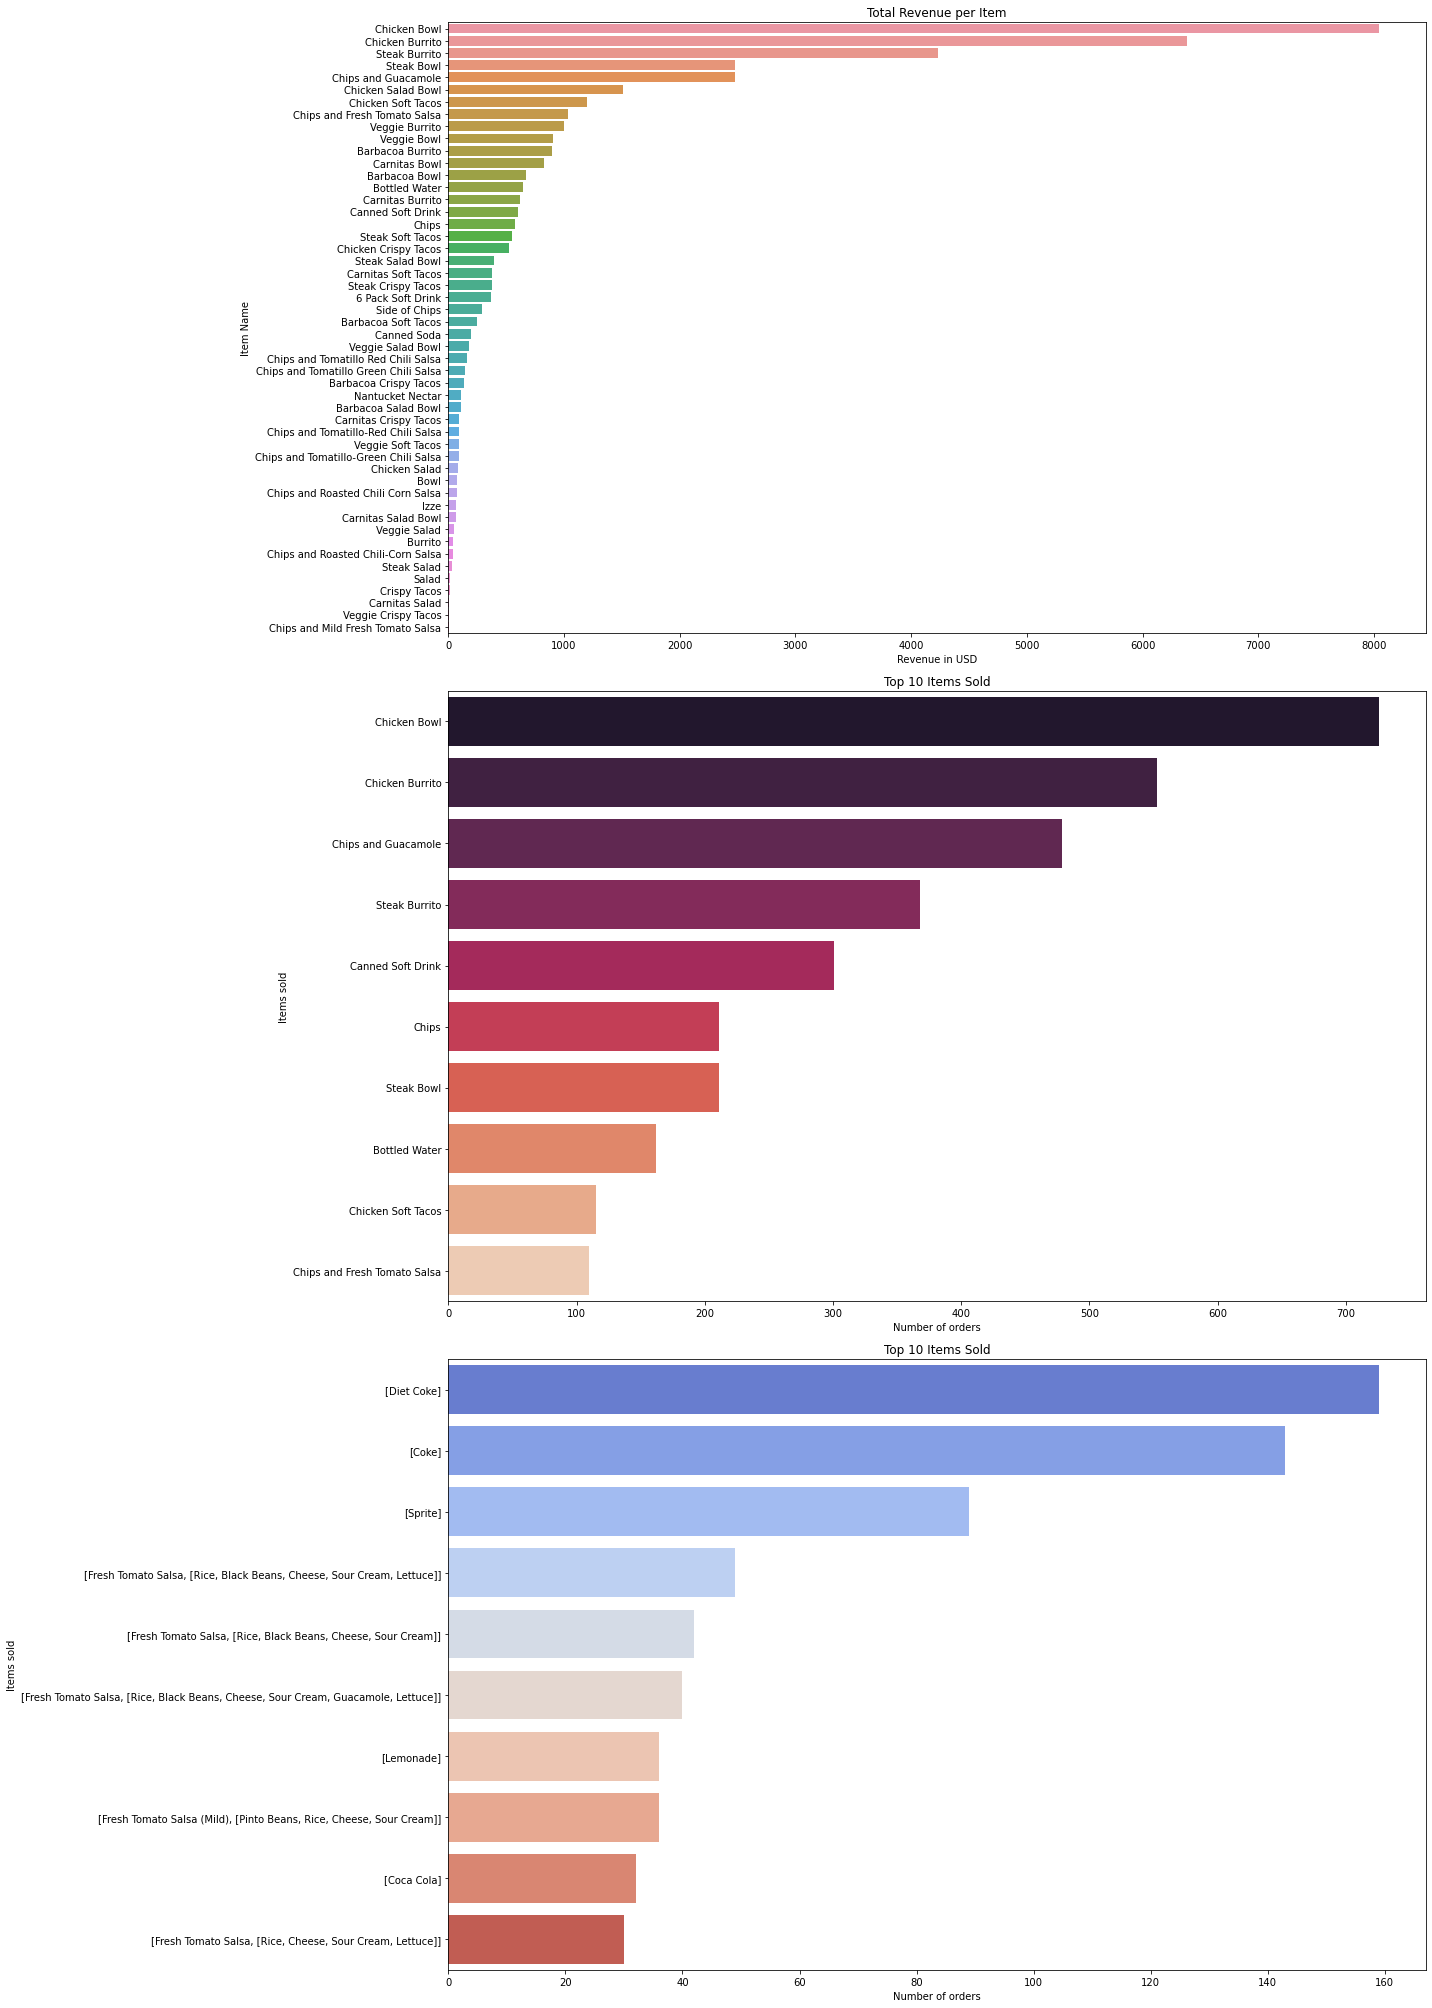

In [62]:
fig, axes = plt.subplots(3, 1, figsize=(20,28))
#Chart 1:  Total revenue per item
sns.barplot(x=order_revenue,y=order_revenue.index,ax=axes[0])
axes[0].set_title('Total Revenue per Item')
axes[0].set_xlabel('Revenue in USD')
axes[0].set_ylabel('Item Name')

#Chart 2:  Top 10 product sold
sns.barplot(x=topsold_10Items,y=topsold_10Items.index,ax=axes[1], palette='rocket')
axes[1].set_title('Top 10 Items Sold')
axes[1].set_xlabel('Number of orders')
axes[1].set_ylabel('Items sold')

# Chart 3: Total Quantity Ordered by Item (Top 10)
sns.barplot(x=c1,y=c1.index,ax=axes[2], palette='coolwarm')
axes[2].set_title('Top 10 Items Sold')
axes[2].set_xlabel('Number of orders')
axes[2].set_ylabel('Items sold')

plt.tight_layout()

plt.show()


